In [1]:
    if __name__ == '__main__':
        %reload_ext pidgin

In [2]:
    a=\
digraph {
    rankdir=LR
    do_execute->run_cell->transform_cell
    subgraph cluster_shell {
        run_cell label="shell specification"
        subgraph cluster_tangle {
            transform_cell->transform_ast
            label="tangle"
        }
        transform_ast->compile-> display 
        subgraph cluster_weave {
            display->{data metadata}
            label=weave
        }
    }
    subgraph cluster_application {kernel->do_execute label="kernel application"}
}

In [3]:
    from IPython import get_ipython

In [4]:
    class shell_kernel:
        user=\
digraph {
    rankdir=LR
    User->Shell[label=tangle]
    Shell->Kernel[label=weave]
} 

        essay=\
digraph{
    rankdir=LR
    Text->Input[label=tangle]
    Input->Output[label=weave]
} 


        repl=\
digraph{
    rankdir=LR
    Read->Eval[label=tangle]
    Eval->Print[label=weave]
    Print->Read[style=dashed label=Loop]
} 

In [5]:
    import IPython, pidgin, nbconvert

In [6]:
    shell = IPython.get_ipython()

In [7]:
    from pathlib import Path

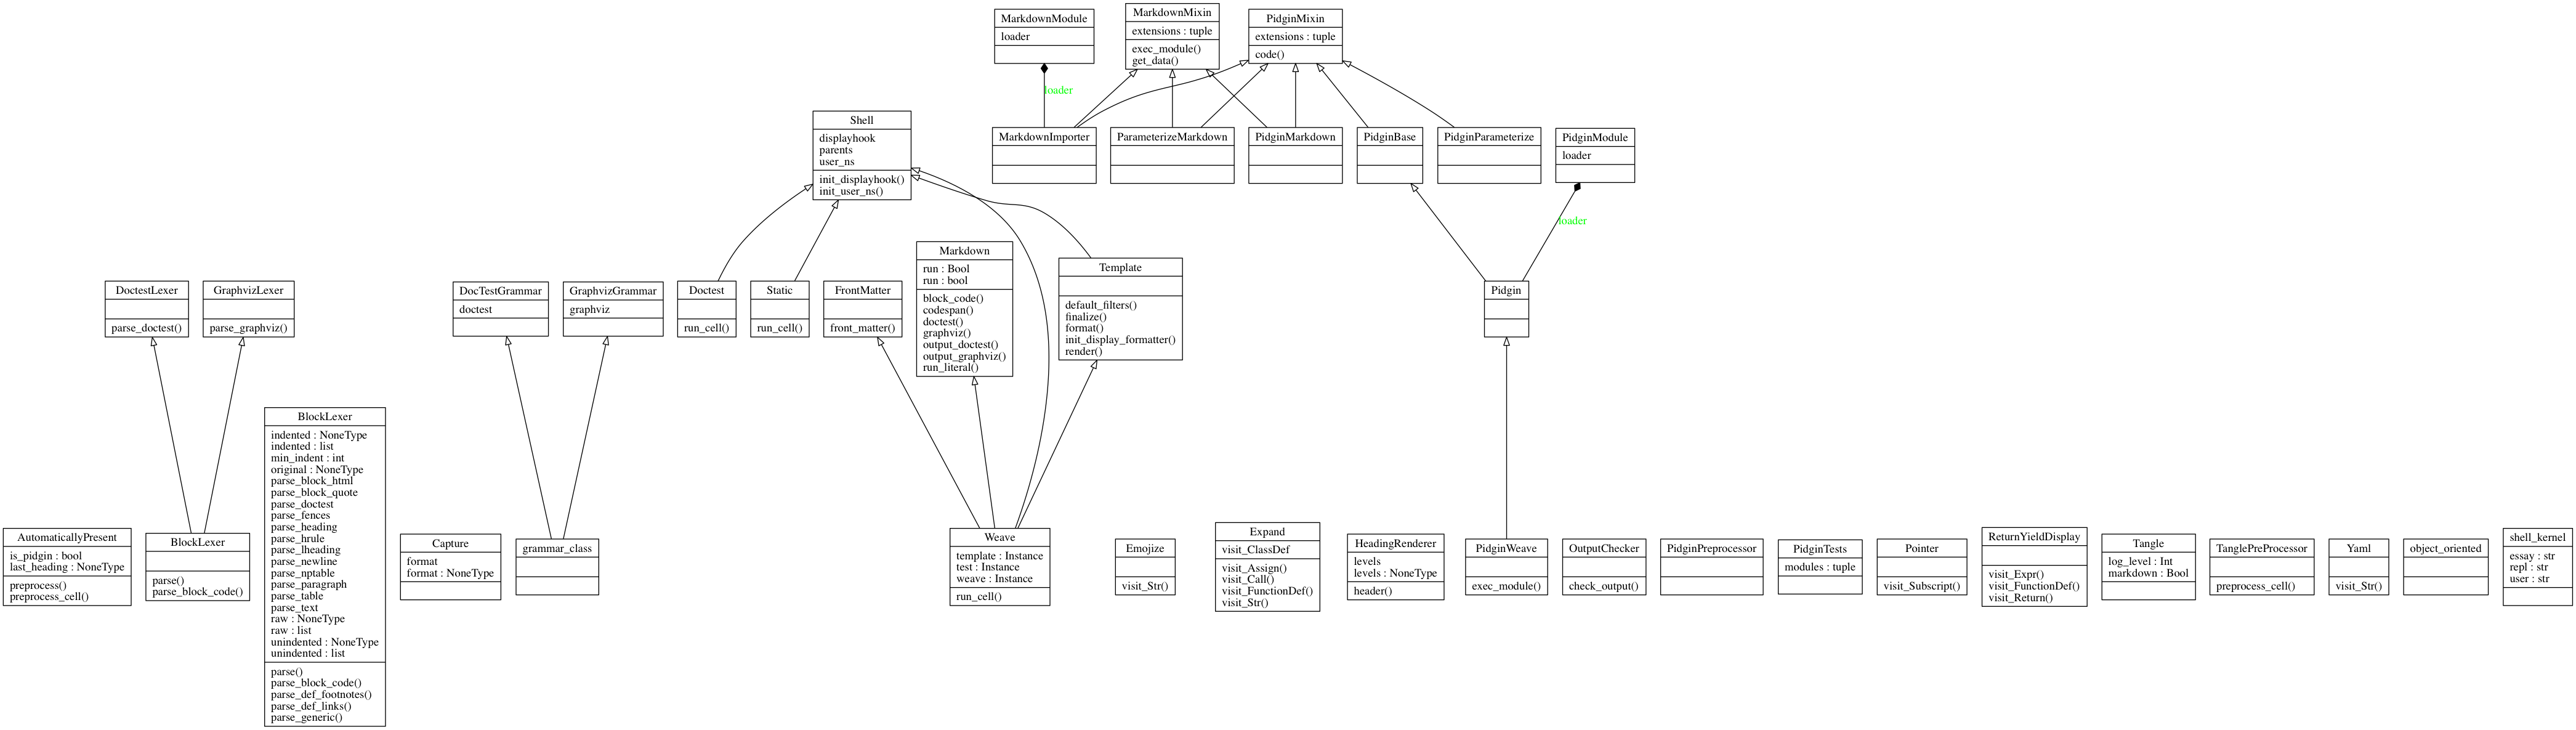

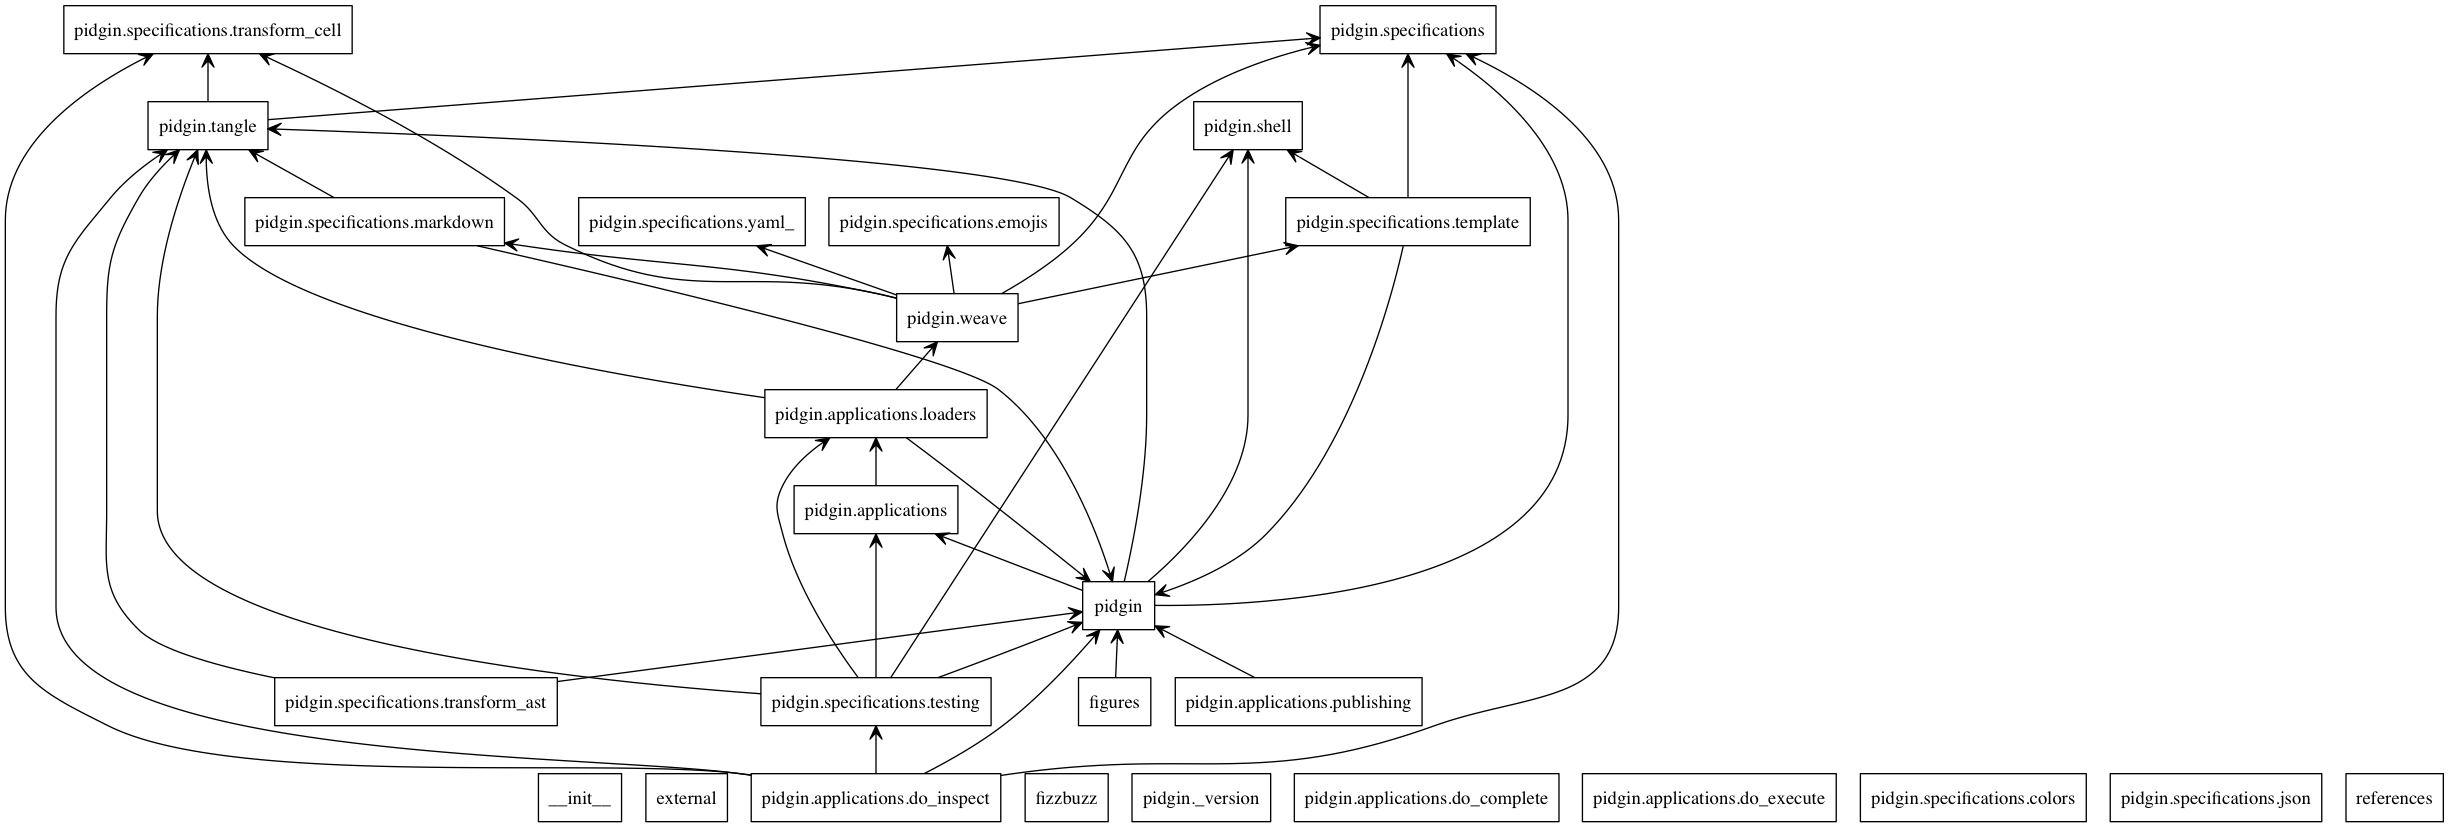

In [8]:
    files = []
    for file in Path(pidgin.__file__).parent.rglob('*.ipynb'):
        files.append(file.with_suffix('').with_suffix('').with_suffix('.py'))
        files[-1].write_text(
            nbconvert.PythonExporter(preprocessors=[pidgin.publishing.TanglePreProcessor()]).from_filename(file.absolute())[0].replace('F"', '"')
        )
    with IPython.utils.capture.capture_output():
        !source activate p6 && pyreverse pidgin -opng -ppidgin
    list(map(__import__('os').remove, files))
    return IPython.display.Image('classes_pidgin.png'), IPython.display.Image('packages_pidgin.png')



In [9]:
UML

In [10]:
    web_diagram=\
digraph {
    rankdir=LR
    WEB -> TEX [label=weave]
    WEB -> PAS [label=tangle]
    TEX -> DVI [label=typesetting]
    PAS -> REL [label=compile]
}

In [11]:
%%object web_implementation
{{web_diagram}}

The original WEB implementation of literate programming defined a bespoke file for the essay.  The file then may weave {{"graph{rankdir=LR WEB->TEX}"}} $or$ tangle {{"graph{rankdir=LR WEB->PASCAL}"}}

In [12]:
web_implementation

'{{web_diagram}}\n\nThe original WEB implementation of literate programming defined a bespoke file for the essay.  The file then may weave {{"graph{rankdir=LR WEB->TEX}"}} $or$ tangle {{"graph{rankdir=LR WEB->PASCAL}"}}\n\n'

In [13]:
    
    pidgin_diagram=\
digraph{
    rankdir=LR
    Jupyter -> pidgin
    pidgin -> Markdown [label=weave]
    pidgin -> IPython [label=tangle]
    Markdown -> display [label=typesetting]
    IPython -> Python [label=compile]
}
    
    pidgin_diagram

'digraph{\n    rankdir=LR\n    Jupyter -> pidgin\n    pidgin -> Markdown [label=weave]\n    pidgin -> IPython [label=tangle]\n    Markdown -> display [label=typesetting]\n    IPython -> Python [label=compile]\n}'